In [1]:
"""
%autoreload 0

Disable automatic reloading.
%autoreload 1

Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 2

Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
"""
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from MLStructFP.db import DbLoader

from MLStructFP_benchmarks.ml.model.core import DataFloorPhoto
from MLStructFP_benchmarks.utils import FloorPatchGenerator, FPDatasetGenerator

import plotly.offline as pyo

pyo.init_notebook_mode()

Using TensorFlow backend.


## Load the dataset

In [7]:
db = DbLoader('../MLSTRUCT-FP/dataset/fp.json')
db.tabulate(legacy=True, limit=5)  # Total: 165

## PatchGenerator

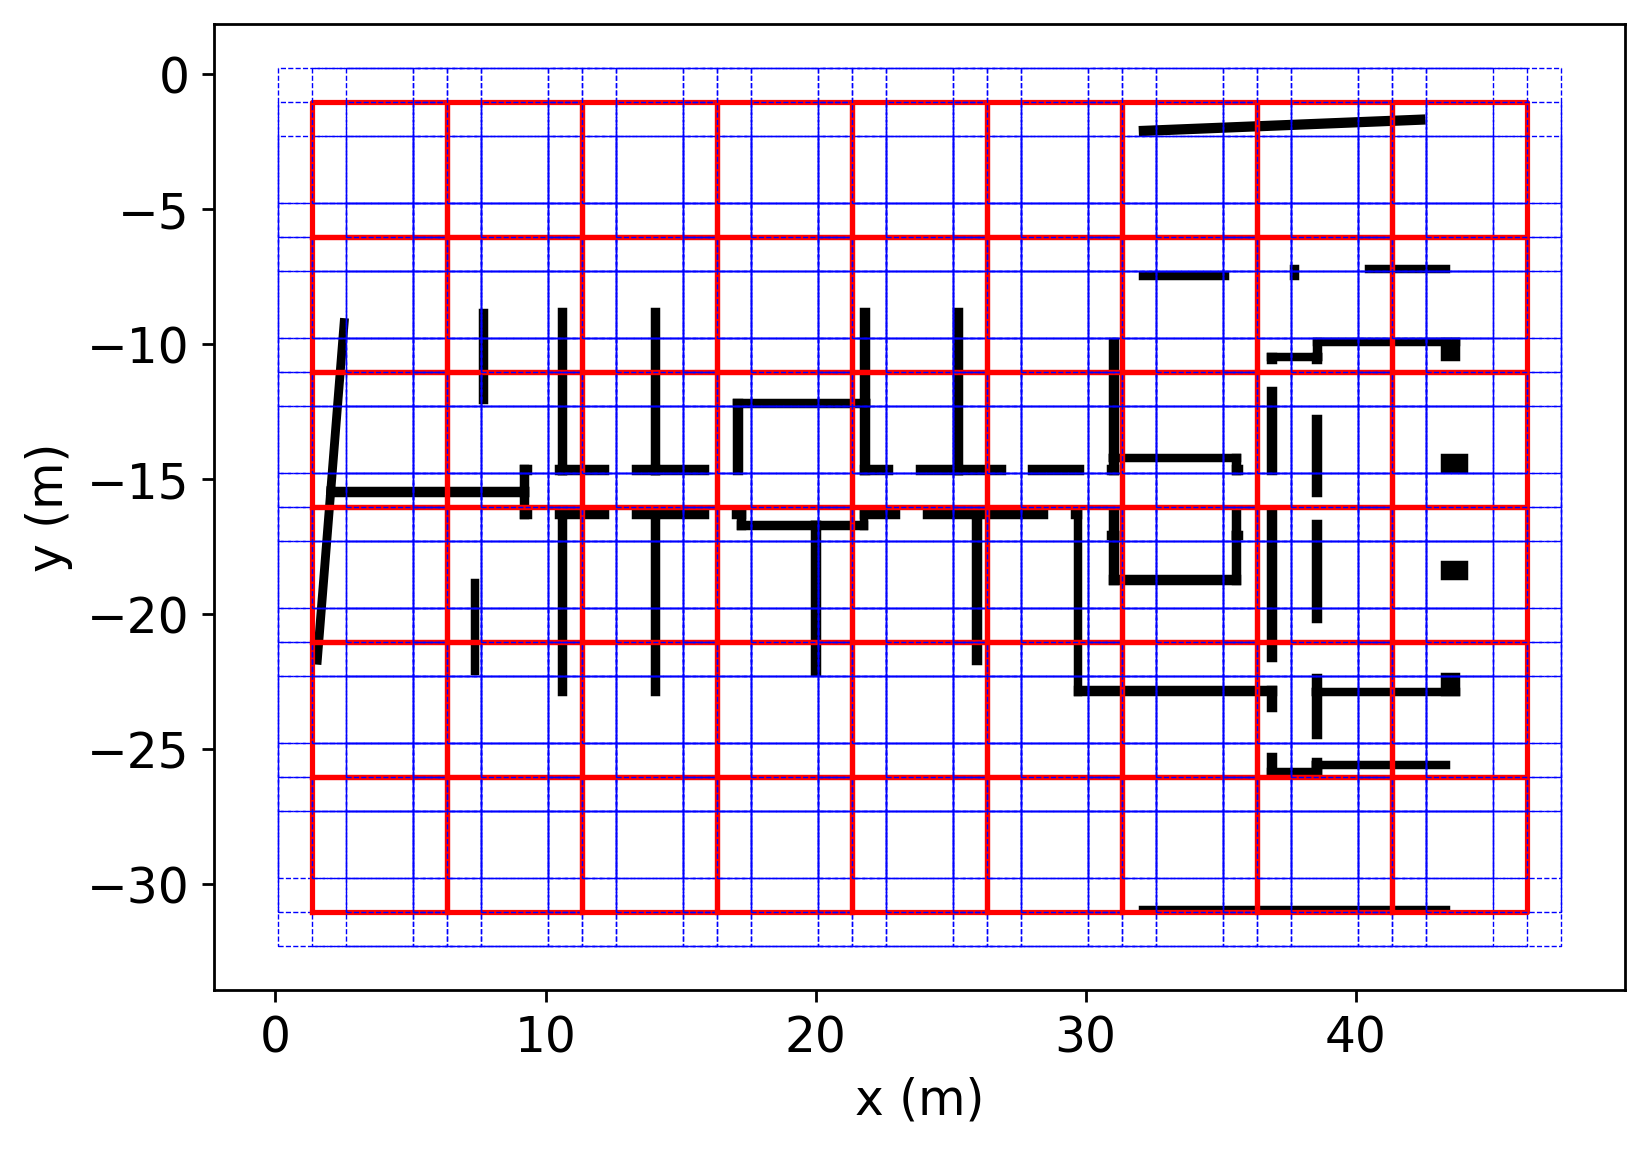

In [4]:
patchgen = FloorPatchGenerator(image_size=256, patch_size=5, bw=False, delta_x=[-0.25, 0, 0.25],
                               delta_y=[-0.25, 0, 0.25])
patchgen.plot_patches(db.floors[0])

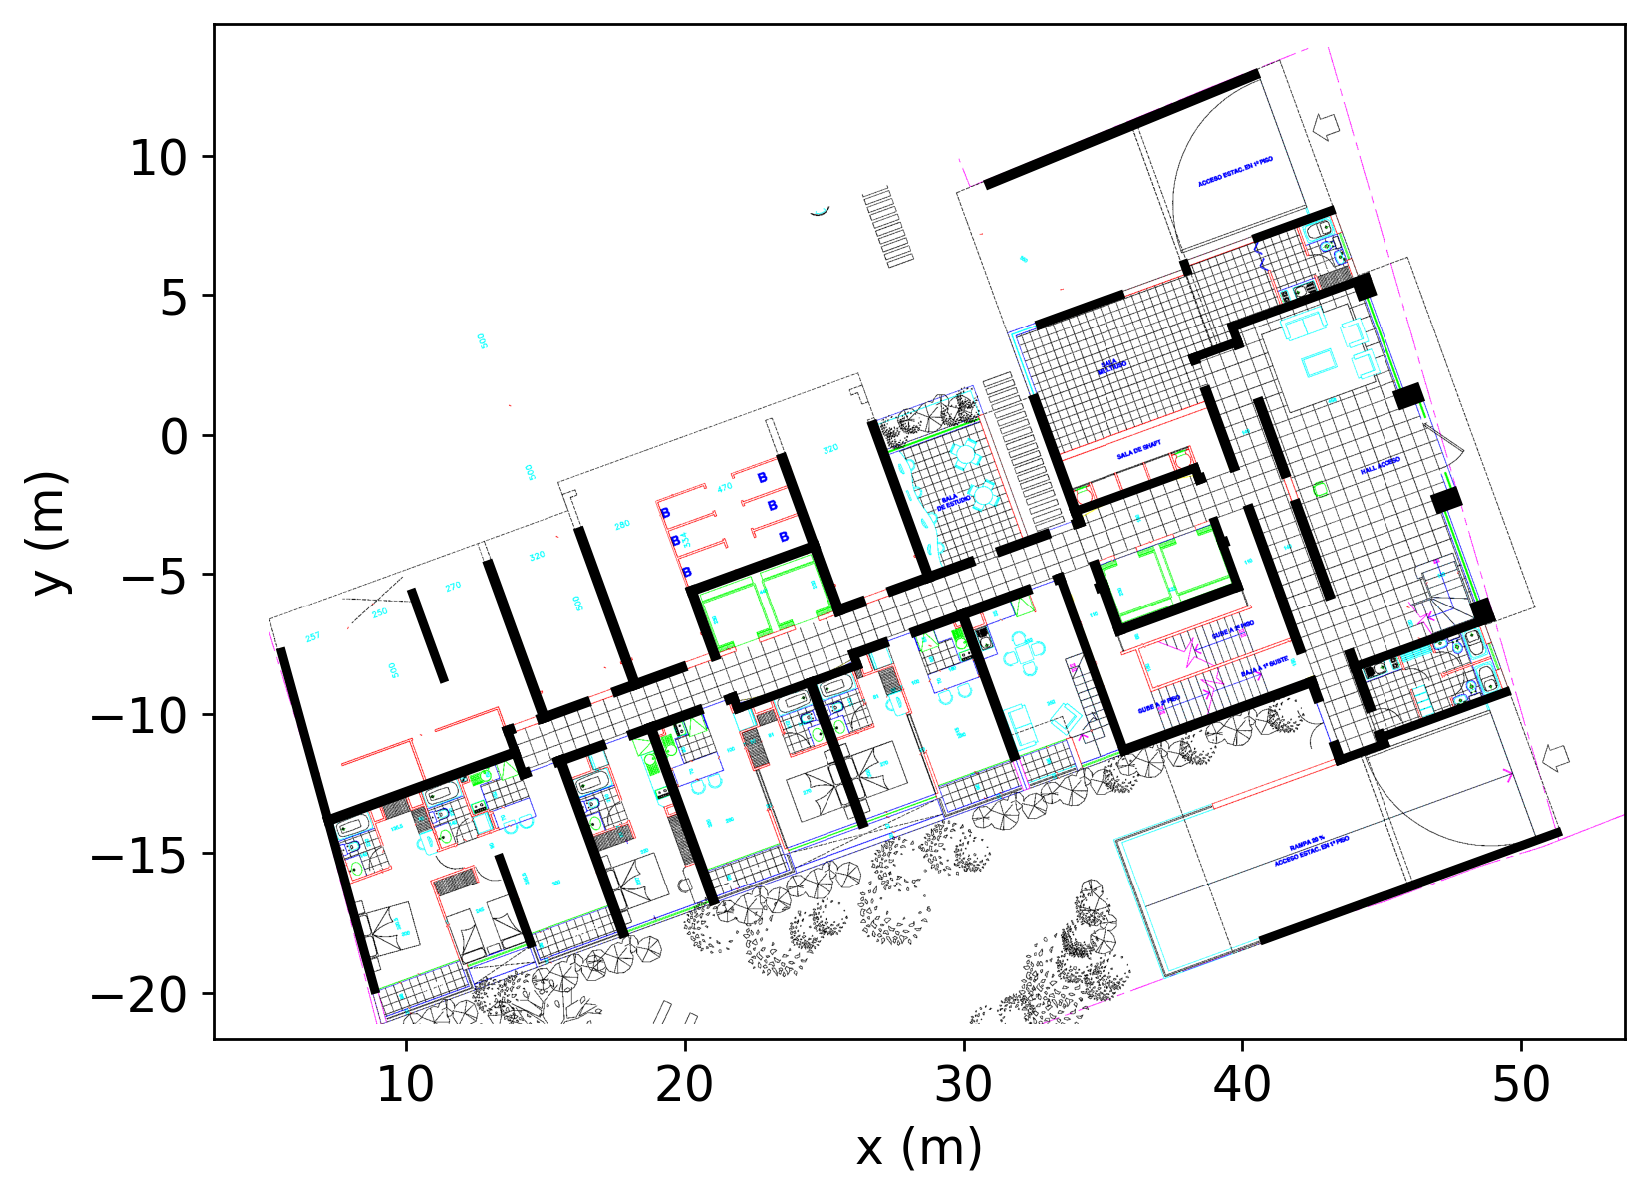

In [5]:
db.floors[0].mutate(20, 1, 1)
patchgen.plot_patches(db.floors[0], patches=False, photo=True)

## Create a custom dataset using patches

To create a custom dataset for train, you must create an **FPDatasetGenerator** object to define the image size (px), patch size (m), if the images are stored in color or black/white, and the offset. Next, its *process_dataset* method must be called to export the **DbLoader** instance of the dataset. This method also receives an option to set which rotation angles will be applied to the images. By default, the export will be performed in parallel, defined with its optional argument *num_thread_processes*.

Internally, **FPDatasetGenerator** class creates a **FloorPatchGenerator** to create the several patches, apply the transformations, and so on. For more information about how the patch generator processes each floor and create the crops, refer to its *_process* method.

In [15]:
# Create 256x256 px images, using patches of 5x5m, in black and white. With an offset of 25%. NO rotation
dbexport = FPDatasetGenerator(image_size=256, patch_size=5, bw=True, delta_x=[-0.25, 0, 0.25], delta_y=[-0.25, 0, 0.25])
_ = dbexport.process_dataset(db=db, path='.data_patches/', rotation_angles=(0,), num_thread_processes=8)

Finally, we create a sesion for this data, which splits the train/test cases. Notice that train/test split is stored in an array of "parts". Each part belong to a processed floor plan patches, compressed as .npz files. Hence, to maintain the same train/test floor partition you can edit the split list, or just override the "\_split" property from DataFloorPhoto.

In [19]:
dfp = DataFloorPhoto(path='.data_patches/')
dfp.assemble_train_test(0.7)  # 70% train, 30% test

# Save the session
dfp.save_session('.session/no_rot_256_50')